In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# What were the majors by categories that resulted in the least amount of unemployment ?

In [53]:
df1=pd.read_csv("all-ages.csv")
df1.isnull().sum()

index                            0
Major_code                       0
Major                            0
Major_category                   0
Total                            0
Employed                         0
Employed_full_time_year_round    0
Unemployed                       0
Unemployment_rate                0
Median                           0
P25th                            0
P75th                            0
dtype: int64

In [54]:

df1=pd.read_csv("all-ages.csv")
q1=df1.groupby("Major_category").agg({'Unemployment_rate':'mean'})
q1=q1.sort_values('Unemployment_rate', ascending=True)
print(q1)

                                     Unemployment_rate
Major_category                                        
Agriculture & Natural Resources               0.039569
Education                                     0.046762
Health                                        0.047209
Biology & Life Science                        0.049936
Engineering                                   0.050630
Business                                      0.054496
Physical Sciences                             0.054541
Industrial Arts & Consumer Services           0.058546
Computers & Mathematics                       0.059437
Social Science                                0.065686
Law & Public Policy                           0.067854
Communications & Journalism                   0.069125
Humanities & Liberal Arts                     0.069429
Interdisciplinary                             0.077269
Psychology & Social Work                      0.077867
Arts                                          0.087601


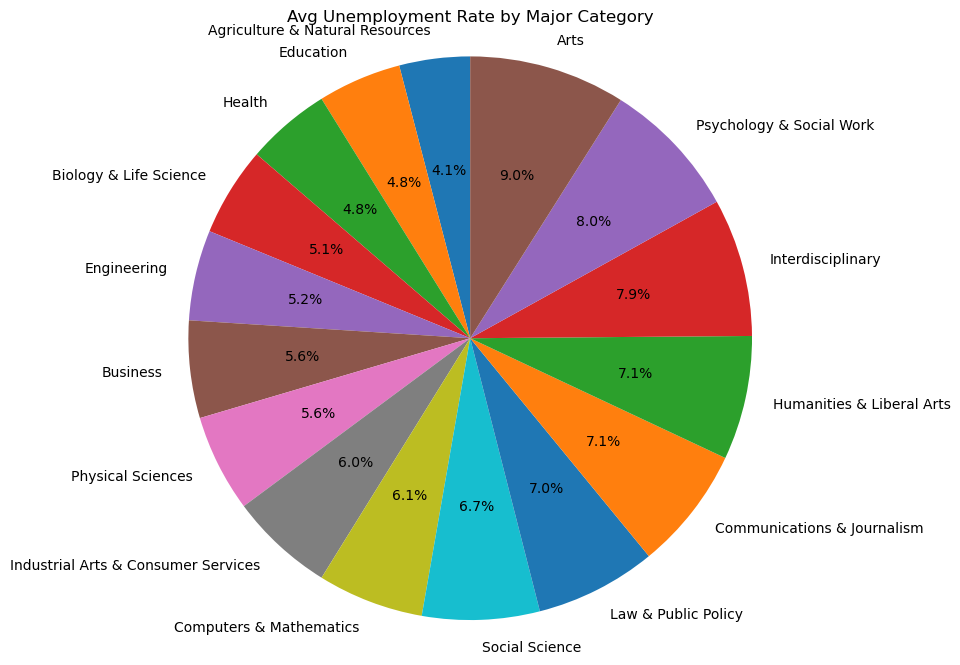

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.pie(q1['Unemployment_rate'], labels=q1.index, autopct='%1.1f%%', startangle=90)
plt.title('Avg Unemployment Rate by Major Category')
plt.axis('equal')

# Display the chart
plt.show()

# Did students recieve a higher meadian salary after graduation?

In [52]:
df2=pd.read_csv("grad-students.csv")
df2.isnull().sum()

index                           0
Major_code                      0
Major                           0
Major_category                  0
Grad_total                      0
Grad_sample_size                0
Grad_employed                   0
Grad_full_time_year_round       0
Grad_unemployed                 0
Grad_unemployment_rate          0
Grad_median                     0
Grad_P25                        0
Grad_P75                        0
Nongrad_total                   0
Nongrad_employed                0
Nongrad_full_time_year_round    0
Nongrad_unemployed              0
Nongrad_unemployment_rate       0
Nongrad_median                  0
Nongrad_P25                     0
Nongrad_P75                     0
Grad_share                      0
Grad_premium                    0
dtype: int64

In [4]:
df2=pd.read_csv("grad-students.csv")
q2=df2.groupby("Major_category").agg({'Nongrad_median':'median','Grad_median':'median'})
q2=q2.sort_values('Grad_median', ascending=False)
print(q2)

                                     Nongrad_median  Grad_median
Major_category                                                  
Engineering                                 78000.0      98000.0
Physical Sciences                           60000.0      88000.0
Biology & Life Science                      55000.0      85000.0
Business                                    60000.0      85000.0
Computers & Mathematics                     68000.0      85000.0
Law & Public Policy                         52000.0      75000.0
Health                                      52000.0      73000.0
Social Science                              54000.0      73000.0
Agriculture & Natural Resources             55000.0      69000.0
Humanities & Liberal Arts                   49000.0      67000.0
Psychology & Social Work                    46000.0      64000.0
Communications & Journalism                 51500.0      62500.0
Industrial Arts & Consumer Services         50000.0      62000.0
Education                

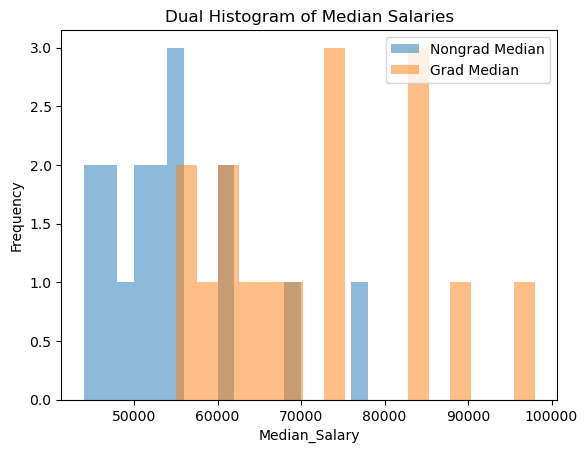

In [73]:
plt.hist(q2['Nongrad_median'], bins=17, alpha=0.5, label='Nongrad Median')

plt.hist(q2['Grad_median'], bins=17, alpha=0.5, label='Grad Median')

plt.xlabel('Median_Salary')
plt.ylabel('Frequency')
plt.title('Dual Histogram of Median Salaries')

plt.legend()

plt.show()

# Was there an increase of full time employment after graduation for students in the STEM? 

In [66]:

df5=pd.read_csv('women-stem.csv')
df2.isnull().sum()

index                           0
Major_code                      0
Major                           0
Major_category                  0
Grad_total                      0
Grad_sample_size                0
Grad_employed                   0
Grad_full_time_year_round       0
Grad_unemployed                 0
Grad_unemployment_rate          0
Grad_median                     0
Grad_P25                        0
Grad_P75                        0
Nongrad_total                   0
Nongrad_employed                0
Nongrad_full_time_year_round    0
Nongrad_unemployed              0
Nongrad_unemployment_rate       0
Nongrad_median                  0
Nongrad_P25                     0
Nongrad_P75                     0
Grad_share                      0
Grad_premium                    0
dtype: int64

In [15]:


df2 = pd.read_csv("grad-students.csv")
df5 = pd.read_csv('women-stem.csv')

merge1 = pd.merge(df2, df5, on='Major_code', how='inner')
merge1.rename(columns={'Major_category_x': 'Category'}, inplace=True)

table3 = merge1[['Category',  'Nongrad_full_time_year_round','Grad_full_time_year_round', 'Men', 'Women']]
table3 = table3.sort_values(by='Grad_full_time_year_round', ascending=False)

combined_category = 'All Categories'
combined_data = table3.groupby(pd.Grouper(key='Category', dropna=False)).sum().reset_index()
combined_data.loc[0, 'Category'] = combined_category

print(combined_data)
combined_data.head()

                  Category  Nongrad_full_time_year_round  \
0           All Categories                        638032   
1                   Health                       1473167   
2              Engineering                       2146985   
3        Physical Sciences                        523719   
4  Computers & Mathematics                       1131208   

   Grad_full_time_year_round     Men   Women  
0                    1072396  184919  268943  
1                     860976   75517  387713  
2                    1408024  408307  129276  
3                     626400   95390   90089  
4                     587727  208725   90283  


,Category,Nongrad_full_time_year_round,Grad_full_time_year_round,Men,Women
0,All Categories,638032,1072396,184919,268943
1,Health,1473167,860976,75517,387713
2,Engineering,2146985,1408024,408307,129276
3,Physical Sciences,523719,626400,95390,90089
4,Computers & Mathematics,1131208,587727,208725,90283
